In [1]:
# import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("titanic/train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("titanic/test.csv")

In [3]:
# Find null values in training data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Missing values for Age, Cabin & Embarked - Need to fill 
train_df = train_df.drop(columns='Cabin', axis=1)
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Cannot process strings, turn into categorical values
train_df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [5]:
# Ensure all the null values are filled 
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Missing values for Age, Cabin & Cabin - Need to fill 
test_df = test_df.drop('Cabin', axis=1)
test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].mean(), inplace=True)

# Cannot process strings, turn into categorical values
test_df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [8]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
# Split into target and feature variables 
X_train = train_df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [10]:
# Create Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, Y_train)

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8002244668911336


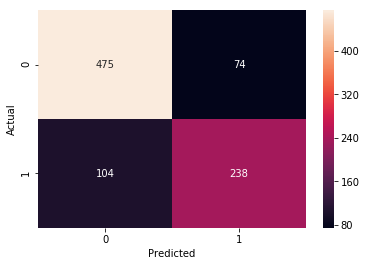

In [11]:
confusion_matrix = pd.crosstab(Y_train, X_train_prediction, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [12]:
# Predict test results 
Y_test = model.predict(X_test)

# Export results, Score results = 0.76555
pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':Y_test}).to_csv('Titanic_Result.csv',index=False)